In [48]:
name = '2016-02-05-ipywidgets-interact'
title = 'ipywidgets.interact() examples'
tags = 'ipywidgets, iris'
author = 'Denis Sergeev'

In [49]:
from nb_tools import connect_notebook_to_post
from IPython.core.display import HTML

html = connect_notebook_to_post(name, title, tags, author)

# Miscellanea

New releases of some packages:

* [Iris 1.9.2](http://scitools.org.uk/iris/docs/v1.9.2/whatsnew/1.9.html#version-1-9-2)
* [xarray](http://xarray.pydata.org/en/stable/whats-new.html#v0-7-0-21-january-2016)

# Plotting function with changing argument

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%matplotlib inline

In [3]:
x = np.linspace(0,1,100)

In [44]:
def pltsin(f, a=2):
    plt.plot(x, a*np.sin(2*np.pi*x*f))
    plt.ylim(-10,10)

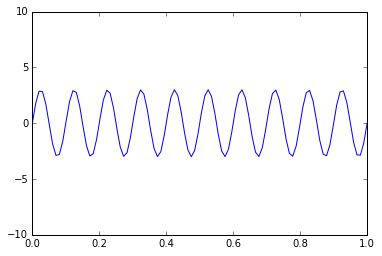

In [47]:
pltsin(10, 3)

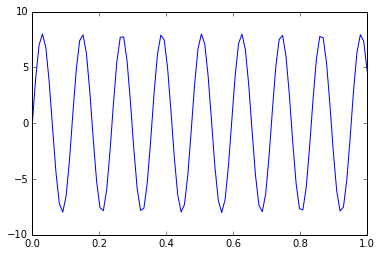

In [10]:
interact(pltsin, f=(1,10,0.1), a=(1,10,1));

# ipywidgets

In [12]:
from ipywidgets import interact

In [13]:
def f(a, b):
    return a+b

In [14]:
interact(f, a=10, b=20)

25

## ipywidgets + contourf + real data

In [15]:
fpath = '../data/data.nc'

In [16]:
import netCDF4 as nc

In [17]:
def fun(filename, varname='', time=0, lev=0):
    with nc.Dataset(filename) as da:
        arr = da.variables[varname][:]
        lon = da.variables['longitude'][:]
        lat = da.variables['latitude'][:]

    fig = plt.figure(figsize=(8,5))
    ax = fig.add_subplot(111)
    c = ax.contourf(lon, lat, arr[time, lev, ...], cmap='viridis')
    fig.colorbar(c, ax=ax, shrink=0.5)

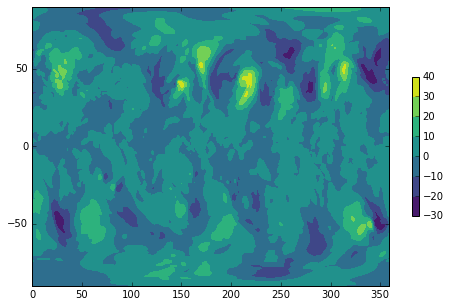

In [18]:
interact(fun, filename=fpath, 
                    varname=['u','v'], 
                    time=(0,1,1), lev=(0,3,1))

## ncview clone in Jupyter

**Tools: iris, cartopy, ipywidgets**

In [20]:
import iris
import cartopy.crs as ccrs

In [29]:
import palettable

In [22]:
iris.FUTURE.netcdf_promote = True

In [24]:
cubelist = iris.load(fpath)

In [26]:
def plot_fun(vardict, time=0, lev=0, cmap='viridis'):
    cube = vardict
        
    arr = cube.data[time, lev, ...]
    lon = cube.coords(axis='x')[0].points
    lat = cube.coords(axis='y')[0].points
    
    fig = plt.figure(figsize=(8,5))
    ax = fig.add_subplot(111, projection=ccrs.PlateCarree())
    ax.coastlines()
    c = ax.contourf(lon, lat, arr, cmap=cmap)
    fig.colorbar(c, ax=ax, shrink=0.5)

In [33]:
def iris_view(filename):
    cubelist = iris.load(filename)
    vardict = {i.name(): cubelist.extract(i.name())[0] for i in cubelist}
    
    #cmaps = ['viridis', 'plasma', 'inferno', 'magma']
    cmaps = [i for i in palettable.colorbrewer.COLOR_MAPS['Sequential']]
    
    interact(plot_fun, 
                        vardict=vardict,
                        time=(0,1,1),
                        lev=(0,3,1),
                        cmap=cmaps)

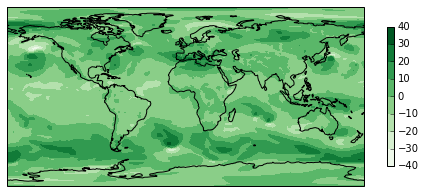

In [34]:
iris_view(fpath)

In [50]:
HTML(html)